In [1]:
pip install opstrat

In [2]:
import opstrat as op


In [19]:
# example of 1398.HK & 939.HK pairs trade
#in this exmaple, 1398.HK is underperforming asset and 939.HK is the outperforming one
# replicating long position in 1398.HK using opitons

# Market price of 1398.HK = $4.50
# At-the-money strike price for call & put options =$4.50
# time to expiry 30 days, risk-free rate 2%, volatility 20%

ICBC_atm_call=op.black_scholes(K=4.5, St=4.5, r=2, t=30, 
                     v=20, type='c')

ICBC_atm_put=op.black_scholes(K=4.5, St=4.5, r=2, t=30, 
                     v=20, type='p')

print(round(ICBC_atm_call['value']['option value'],2),round(ICBC_atm_put['value']['option value'],2))

0.11 0.1


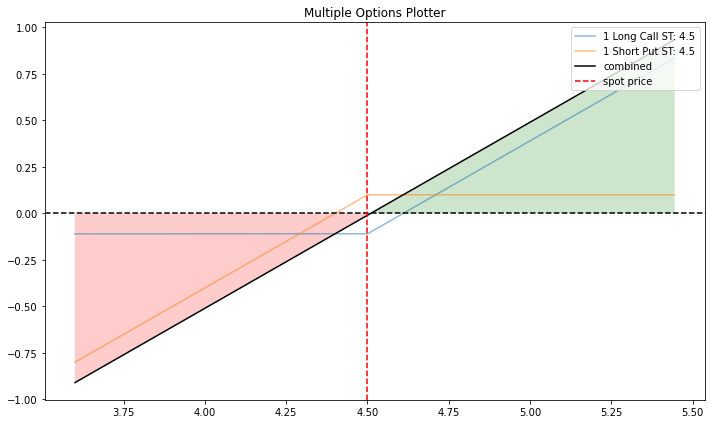

In [5]:
#by rounding to 2dp, values of 1398 call & put option are 0.11 & 0.10
# sell the put and buy the call to replicate the long position in 1398.HK

op_1 = {'op_type':'c','strike':4.50,'tr_type':'b','op_pr':0.11}
op_2 = {'op_type':'p','strike':4.50,'tr_type':'s','op_pr':0.10}
op.multi_plotter(spot=4.5, op_list=[op_1,op_2])


In [20]:
# replicating short position in 939.HK using opitons
# Market price of 939.HK = $6.75 
# At-the-money strike price for call & put =$6.75
# time to expiry 30 days, risk-free rate 2%, volatility 22%

CCB_atm_call=op.black_scholes(K=6.75, St=6.75, r=2, t=30, 
                     v=22, type='c')

CCB_atm_put=op.black_scholes(K=6.75, St=6.75, r=2, t=30, 
                     v=22, type='p')

print(round(CCB_atm_call['value']['option value'],2),round(CCB_atm_put['value']['option value'],2))

0.18 0.16


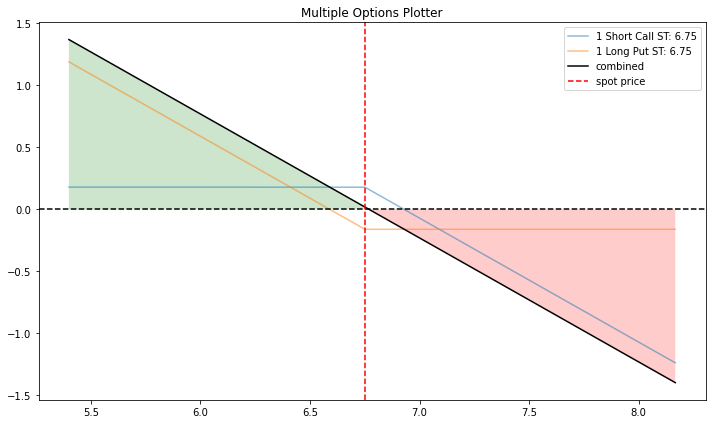

In [7]:
#by rounding to 2dp, values of 939 call & put option are 0.18 & 0.16
# sell the call and buy the put to replicate the short position in 939.HK

op_1 = {'op_type':'c','strike':6.75,'tr_type':'s','op_pr':0.18}
op_2 = {'op_type':'p','strike':6.75,'tr_type':'b','op_pr':0.16}
op.multi_plotter(spot=6.75, op_list=[op_1,op_2])

In [18]:
# time to expiry 30 days, risk-free rate 2%
# market price of 1398.HK is $4.50 & volatility is 20%
# market price of 939.HK is $6.75 & volatility is 22%

ICBC_atm_put=op.black_scholes(K=4.5, St=4.5, r=2, t=30, 
                     v=20, type='p')

CCB_atm_call=op.black_scholes(K=6.75, St=6.75, r=2, t=30, 
                     v=22, type='c')

print(round(CCB_atm_call['value']['option value'],2),round(ICBC_atm_put['value']['option value'],2))

0.18 0.1


In [17]:
# profit from time decay

# time to expiry 10 days, risk-free rate 2%
# volatility for 1398.HK is 20%
# volatility for 939.HK is 22%

ICBC_atm_put=op.black_scholes(K=4.5, St=4.5, r=2, t=10, 
                     v=20, type='p')

CCB_atm_call=op.black_scholes(K=6.75, St=6.75, r=2, t=10, 
                     v=22, type='c')

print(round(CCB_atm_call['value']['option value'],2),round(ICBC_atm_put['value']['option value'],2))

0.1 0.06


In [21]:
# time to expiry 30 days, risk-free rate 2%
# volatility for 1398.HK is 15%
# volatility for 939.HK is 17%

ICBC_atm_put=op.black_scholes(K=4.5, St=4.5, r=2, t=30, 
                     v=15, type='p')

CCB_atm_call=op.black_scholes(K=6.75, St=6.75, r=2, t=30, 
                     v=17, type='c')

print(round(CCB_atm_call['value']['option value'],2),round(ICBC_atm_put['value']['option value'],2))

0.14 0.07


In [36]:
# for 1398.HK long position, entry long price is $4.50 
# for 939.HK short position, entry short price is $6.75
# the spread is converging, now 1398.HK is trading at $5.00 & 939.HK is trading at 6.25

# to calculate the option prices and form a collar for 1398.HK long leg:
# define parameters: OTM call stirke= $5.25 & ATM put stirke $5, assuming volatility is 20%

ICBC_otm_call=op.black_scholes(K=5.25, St=5, r=2, t=30, 
                     v=20, type='c')

ICBC_atm_put=op.black_scholes(K=5, St=5, r=2, t=30, 
                     v=20, type='p')

print(round(ICBC_otm_call['value']['option value'],2),round(ICBC_atm_put['value']['option value'],2))

0.03 0.11


In [37]:
# to calculate the option prices and form a reverse collar for 939.HK short leg:
# define parameters: ATM call stirke= $6.25 & OTM put stirke $6, assuming volatility is 22%

CCB_atm_call=op.black_scholes(K=6.25, St=6.25, r=2, t=30, 
                     v=22, type='c')

CCB_otm_put=op.black_scholes(K=6, St=6.25, r=2, t=30, 
                     v=22, type='p')

print(round(CCB_atm_call['value']['option value'],2),round(CCB_otm_put['value']['option value'],2))

0.16 0.06
